# Sales Dashboard FY19-20

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np

In [142]:
sales_data = pd.read_csv("Sales Dataset.csv")

In [191]:
data_size = sales_data.shape

During Fiscal Year 2019-2020, we've collected 13 metrics from on 78,025 opportunities to help understand the effectiveness of the sales team in the company. Here is a quick example of the data we have analyzed:

In [144]:
sales_data.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


So we are looking at the size of the opportunity, data about the prospect (revenue, team size, location), what product they are interested in, the sales channel they've come through, the sales velocity, and whether the opportunity ended up Won or Lost. Here is a bar chart showing the number of won and lost opportunities:

In [201]:
plt.bar(sales_data['Opportunity Status'].value_counts().index,
           sales_data['Opportunity Status'].value_counts(), color=['red', 'blue'], alpha=0.8)

<BarContainer object of 2 artists>

The Win percentage for FY19-20 was:

In [146]:
f"{(sales_data['Opportunity Status'].value_counts().values[1]/(sales_data['Opportunity Status'].value_counts().values[0]+sales_data['Opportunity Status'].value_counts().values[1]))*100:.2f}%"

'22.59%'

We can break down that data further. First by sales channel:

In [186]:
channel_won_lost = sales_data.value_counts(subset=['B2B Sales Medium', 'Opportunity Status'],sort = False)

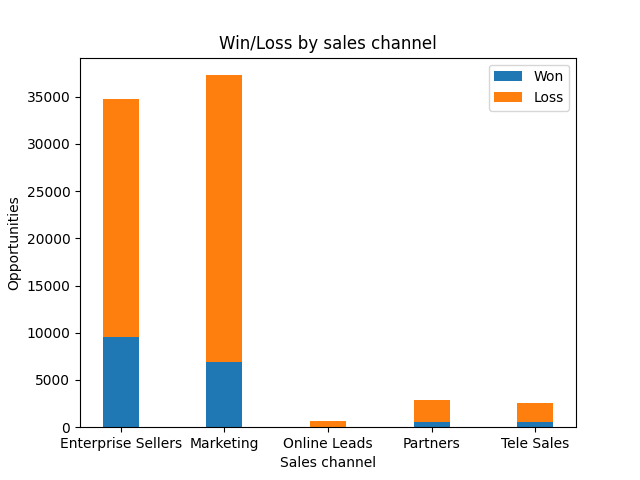

In [197]:
labels = ['Enterprise Sellers','Marketing', 'Online Leads', 'Partners', 'Tele Sales']
channel_won_lost = sales_data.value_counts(subset=['B2B Sales Medium', 'Opportunity Status'],sort = False)
won = [channel_won_lost[1], channel_won_lost[3], channel_won_lost[5], channel_won_lost[7], channel_won_lost[9]]
loss = [channel_won_lost[0], channel_won_lost[2], channel_won_lost[4], channel_won_lost[6], channel_won_lost[8]]

width = 0.35       # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()

ax.bar(labels, won, width, label='Won')
ax.bar(labels, loss, width, bottom=won,
       label='Loss')

ax.set_ylabel('Opportunities')
ax.set_xlabel('Sales channel')
ax.set_title('Win/Loss by sales channel')
ax.legend()

Most deals are coming through Enterprise Sellers and Marketing. Enterprise sellers are more effective. Online leads are negligible right now (and have a high lost rate). Partners and Tele Sales are also small. Let's look at opportunity sizing:

In [185]:
opp_size_won_lost = sales_data.value_counts(subset=['Opportunity Sizing', 'Opportunity Status'],sort = False)

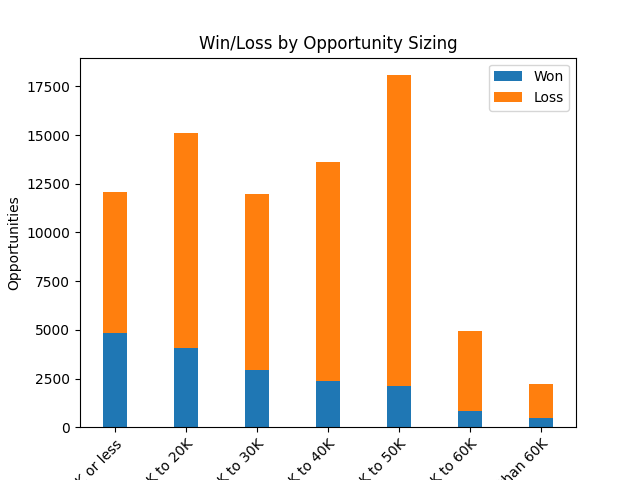

In [196]:
labels = ['10K or less','10K to 20K', '20K to 30K', '30K to 40K', '40K to 50K', '50K to 60K', 'More than 60K']
opp_size_won_lost = sales_data.value_counts(subset=['Opportunity Sizing', 'Opportunity Status'],sort = False)
won = [opp_size_won_lost[1], opp_size_won_lost[3], opp_size_won_lost[5], opp_size_won_lost[7], opp_size_won_lost[9], opp_size_won_lost[11], opp_size_won_lost[13]]
loss = [opp_size_won_lost[0], opp_size_won_lost[2], opp_size_won_lost[4], opp_size_won_lost[6], opp_size_won_lost[8], opp_size_won_lost[10], opp_size_won_lost[12]]

width = 0.35       # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()

ax.bar(labels, won, width, label='Won')
ax.bar(labels, loss, width, bottom=won,
       label='Loss')

ax.set_ylabel('Opportunities')
ax.set_xlabel('Opportunity Sizing')
xticks = ax.get_xticks()
ax.set_xticks(xticks, labels, rotation=45, ha='right', rotation_mode='anchor')
ax.set_title('Win/Loss by Opportunity Sizing')
ax.legend()

Our best win ratio is for smaller opportunities. < 20k seems to be the sweet spot. The $40k-50k size deals look to be a concern for the company. Though we have a lot of these deals in the pipeline, we're losing a high percentage of them.

We also took a look at sales velocity to understand how quickly these deals were moving through the pipeline. Here is a histogram of sales velocity vs opportunities:

In [195]:
plt.hist(sales_data['Sales Velocity'],np.arange(1,200))

(array([6.670e+02, 6.530e+02, 6.310e+02, 6.960e+02, 5.240e+02, 5.750e+02,
        1.629e+03, 3.930e+02, 1.058e+03, 7.320e+02, 7.970e+02, 6.590e+02,
        5.310e+02, 8.030e+02, 4.700e+02, 5.010e+03, 9.050e+02, 1.220e+03,
        6.600e+02, 7.990e+02, 8.410e+02, 6.430e+02, 1.455e+03, 1.233e+03,
        7.490e+02, 1.135e+03, 1.115e+03, 1.173e+03, 7.010e+02, 7.310e+02,
        3.300e+02, 5.430e+02, 3.730e+02, 4.300e+02, 1.226e+03, 6.650e+02,
        1.412e+03, 6.020e+02, 7.450e+02, 7.210e+02, 9.520e+02, 6.580e+02,
        7.350e+02, 2.388e+03, 1.238e+03, 8.620e+02, 9.220e+02, 6.850e+02,
        1.098e+03, 4.490e+02, 5.560e+02, 4.750e+02, 7.350e+02, 1.124e+03,
        8.070e+02, 7.150e+02, 5.590e+02, 7.770e+02, 4.880e+02, 5.620e+02,
        5.340e+02, 1.738e+03, 1.107e+03, 9.760e+02, 9.450e+02, 6.440e+02,
        6.830e+02, 4.630e+02, 4.260e+02, 4.770e+02, 5.200e+02, 6.860e+02,
        9.120e+02, 1.020e+03, 6.130e+02, 6.180e+02, 5.290e+02, 4.690e+02,
        6.950e+02, 4.350e+02, 9.760e+0

As you can see, there is a large spike in deals closed at Day 16. Maybe the sales team has a good understanding of the reason why? Though there is a spike, it doesn't seem to translate into more deals won:

In [200]:
# multiple conditions
loss_day_16 = sales_data[(sales_data['Sales Velocity'] == 16) & (sales_data['Opportunity Status'] == 'Loss')].shape[0]
won_day_16 = sales_data[(sales_data['Sales Velocity'] == 16) & (sales_data['Opportunity Status'] == 'Won')].shape[0]

plt.bar(['Won', 'Loss'],[won_day_16,
           loss_day_16], color=['red', 'blue'], alpha=0.8)


<BarContainer object of 2 artists>

We also expanded out this type of analysis across all sales velocity lengths to see if there was any pattern to length of sales process, opportunity size, and whether the deal was closed won or lost:

In [199]:
colors = {'Won':'blue', 'Loss':'orange'}
plt.scatter(sales_data['Sales Velocity'],sales_data['Opportunity Size (USD)'],c=sales_data['Opportunity Status'].map(colors))

So we can see that anything after ~ 90 days is lost.